**Exploring Traffic Patterns on I-94: An Exploratory Data Analysis Project**

Embarking on a captivating journey through the intricacies of traffic analysis on I-94. Our overarching objective is to decipher the factors that contribute to heavy traffic, with a keen focus on variables like weather conditions, time of day, and day of the week. By harnessing the power of data visualization techniques acquired throughout the course, I aim to not only unearth meaningful insights but also master the art of effectively communicating our findings.

In this project, I delve into the depths of traffic data, employing a wide array of visual tools to illuminate patterns and correlations that shape the ebb and flow of congestion. Our mission extends beyond data exploration; I aspire to contribute to the realm of transportation knowledge, potentially paving the way for improved urban planning and traffic management strategies. Join me as I merge theory and practice, creating a comprehensive analysis that not only quenches our thirst for discovery but also equips us with invaluable skills for impactful data storytelling.

In [2]:
import pandas as pd

In [3]:
dataSetFile=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [4]:
dataSetFile.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
dataSetFile.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [6]:
dataSetFile.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [7]:
dataSetFile.shape

(48204, 9)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
pip install matplotlib

You should consider upgrading via the 'c:\Users\agraw\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

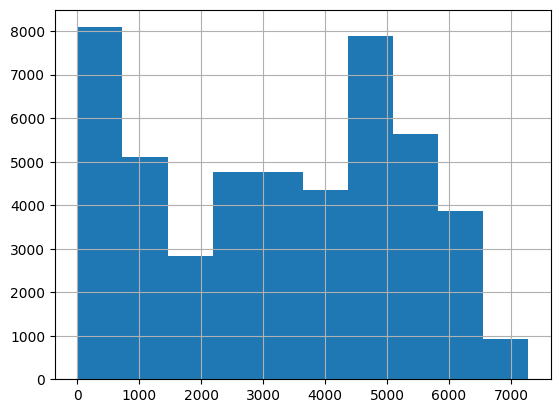

In [11]:
dataSetFile['traffic_volume'].hist()
plt.show()

In [12]:
dataSetFile.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [13]:
dateTime = pd.to_datetime(dataSetFile['date_time'])

In [14]:
dateTime

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

In [15]:
hour=dateTime.dt.hour

In [16]:
hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int32

In [17]:
daytime=dataSetFile.copy()[(hour>=7)&(hour<19)]
nighttime=dataSetFile.copy()[(hour<7)|(hour>=19)]

In [18]:
daytime

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48194,NaN,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302
48195,NaN,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,NaN,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,NaN,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132


In [19]:
nighttime

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,NaN,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,NaN,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,NaN,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,NaN,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,NaN,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


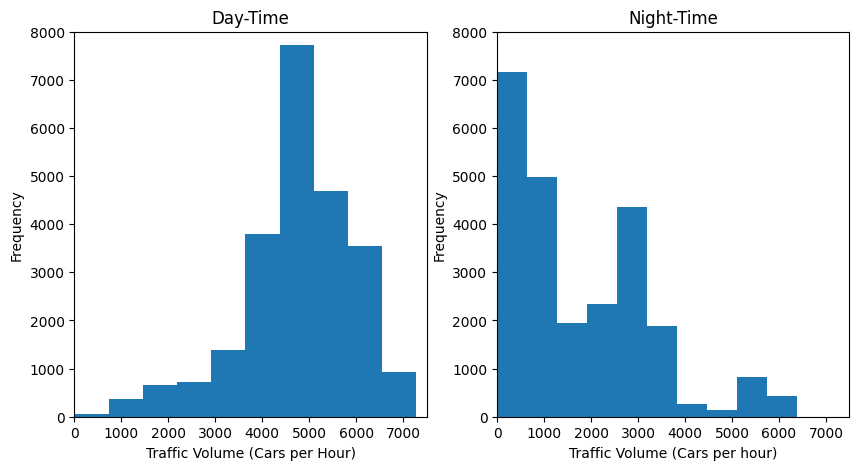

In [20]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(daytime['traffic_volume'])
plt.title("Day-Time")
plt.xlabel("Traffic Volume (Cars per Hour)")
plt.ylabel("Frequency")
plt.xlim([0,7500])
plt.ylim([0,8000])

plt.subplot(1,2,2)
plt.hist(nighttime['traffic_volume'])
plt.title("Night-Time")
plt.xlabel("Traffic Volume (Cars per hour)")
plt.ylabel("Frequency")
plt.xlim([0,7500])
plt.ylim([0,8000])

plt.show()

**Histogram Shapes and Interpretation:**
The histograms exhibit distinct shapes that provide insight into the distribution of traffic volume during daytime and nighttime. The daytime histogram displays a left-skewed distribution, indicative of a concentration of instances with higher traffic volumes and a tail of lower volumes. Conversely, the nighttime histogram demonstrates a right-skewed distribution, suggesting a focus on lower traffic volumes with occasional instances of higher values.

**Comparing Y-Axis Values:**
When comparing the peak y-axis values, the daytime histogram reaches nearly 8000, whereas the nighttime histogram only crosses 7000. This difference accentuates the disparity in traffic volumes between the two time periods, emphasizing that the majority of traffic occurs during the day.

**Considering Light Traffic at Night:**
Given the evident contrast in traffic volumes between day and night, the relevance of nighttime data in identifying indicators of heavy traffic comes into question. While analyzing heavy traffic, it's prudent to consider periods when traffic is substantial and the potential causes can be better discerned. With nighttime traffic volumes generally lighter, focusing solely on daytime data is reasonable to unravel the factors contributing to heavy traffic.

In [21]:
daytime['date_time'] = pd.to_datetime(daytime['date_time'])
daytime['month'] = daytime['date_time'].dt.month
daytime

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month
0,NaN,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10
1,NaN,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,NaN,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10
3,NaN,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10
4,NaN,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10
...,...,...,...,...,...,...,...,...,...,...
48194,NaN,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,9
48195,NaN,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,9
48196,NaN,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,9
48197,NaN,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,9


In [22]:
numeric_columns = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']
daytime_numeric = daytime[numeric_columns]
by_month = daytime_numeric.groupby(daytime['month']).mean()
by_month['traffic_volume']


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

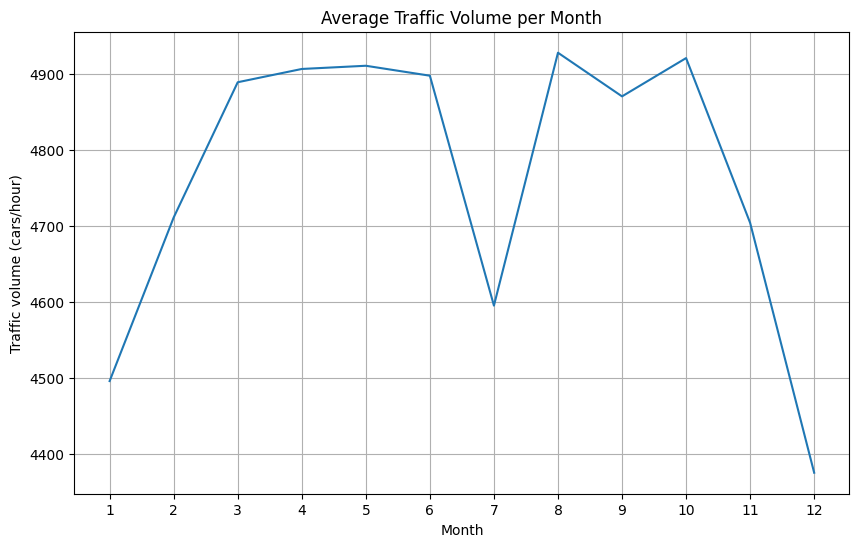

In [23]:
#for column in by_month.traffic_volume:
plt.figure(figsize=(10, 6)) 
by_month['traffic_volume'].plot.line() 
plt.xlabel('Month')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.ylabel('Traffic volume (cars/hour)')
plt.title('Average Traffic Volume per Month')
plt.grid()
plt.show()

**Low Traffic Months:** The line representing the 'traffic_volume' feature exhibits a distinctive trend. Notably, traffic volume appears to be considerably lower during the months of January and July. This observation suggests a recurring pattern of decreased traffic activity during the peak winter (January) and summer (July) months. It's plausible that these months might correspond to holidays, vacation periods, or inclement weather conditions, leading to reduced commuting and travel.

**Seasonal Descent:** An additional intriguing trend is evident from October onward. The line depicting 'traffic_volume' starts to descend gradually from October, with a notable dip in December. This decline may signify a correlation with the onset of winter, when adverse weather conditions and holiday-related factors could contribute to diminished road activity. The lowest traffic volume recorded in December could likely be attributed to a combination of factors, including holidays, harsh weather, and reduced work-related commuting.

In [24]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
daytime

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,dayofweek
0,NaN,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,1
1,NaN,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1
2,NaN,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,1
3,NaN,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,1
4,NaN,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,1
...,...,...,...,...,...,...,...,...,...,...,...
48194,NaN,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,9,6
48195,NaN,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,9,6
48196,NaN,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,9,6
48197,NaN,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,9,6


In [25]:
by_dayofweek = daytime_numeric.groupby(daytime['dayofweek']).mean()
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

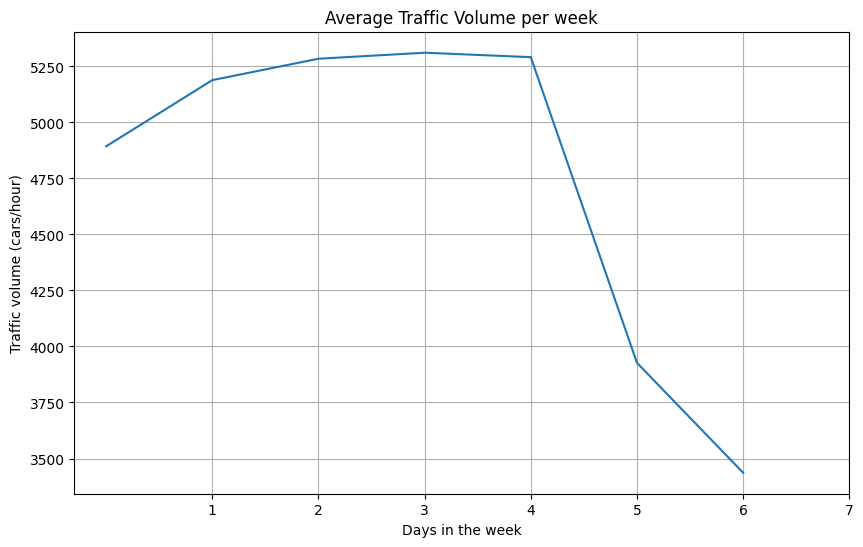

In [26]:
plt.figure(figsize=(10, 6)) 
by_dayofweek['traffic_volume'].plot.line() 
plt.xlabel('Days in the week')
plt.xticks(ticks=[1,2,3,4,5,6,7])
plt.ylabel('Traffic volume (cars/hour)')
plt.title('Average Traffic Volume per week')
plt.grid()
plt.show()

**Weekday Traffic Surge:** The graph portrays a consistent and ascending trajectory from Monday through Thursday. This upward trend suggests progressively increasing traffic volume during the weekdays. This trend aligns with typical workweek patterns, where people are commuting to their workplaces, educational institutions, and other engagements.

**Weekend Contrast:** However, a significant shift occurs as Thursday transitions to Friday. The traffic line experiences a substantial drop, signifying a noticeable reduction in traffic volume. This trend continues into Saturday, depicting a further decline. This shift is indicative of a clear distinction between business days and weekends, where traffic volume experiences a sharp decline during the weekend.

Inferences drawn from the graph reveal that traffic follows a pattern that aligns with working schedules. Weekdays witness heightened traffic as people travel for work, education, and other commitments. Conversely, weekends witness a stark reduction in traffic, reflecting a break from routine and reduced travel for professional purposes.

In [27]:
numeric_columns = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']
daytime['date_time'] = pd.to_datetime(daytime['date_time'])
daytime['hour'] = daytime['date_time'].dt.hour


In [28]:
daytime

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,dayofweek,hour
0,NaN,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,1,9
1,NaN,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,NaN,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,1,11
3,NaN,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,1,12
4,NaN,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...
48194,NaN,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,9,6,15
48195,NaN,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,9,6,15
48196,NaN,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,9,6,16
48197,NaN,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,9,6,17


In [29]:
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] 
weekend = daytime.copy()[daytime['dayofweek'] >= 5] 

In [30]:
bussiness_days

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,dayofweek,hour
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,1,9
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,1,11
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,1,12
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...
48143,NaN,285.00,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 14:00:00,5193,9,4,14
48144,NaN,285.14,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 15:00:00,5838,9,4,15
48145,NaN,285.33,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 16:00:00,6188,9,4,16
48146,NaN,285.24,0.0,0.0,75,Clouds,broken clouds,2018-09-28 17:00:00,5695,9,4,17


In [31]:
by_hour_business = bussiness_days[numeric_columns].groupby(bussiness_days['hour']).mean()
by_hour_weekend = weekend[numeric_columns].groupby(weekend['hour']).mean()

In [32]:
by_hour_business['traffic_volume']

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

In [33]:
by_hour_weekend['traffic_volume']

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64

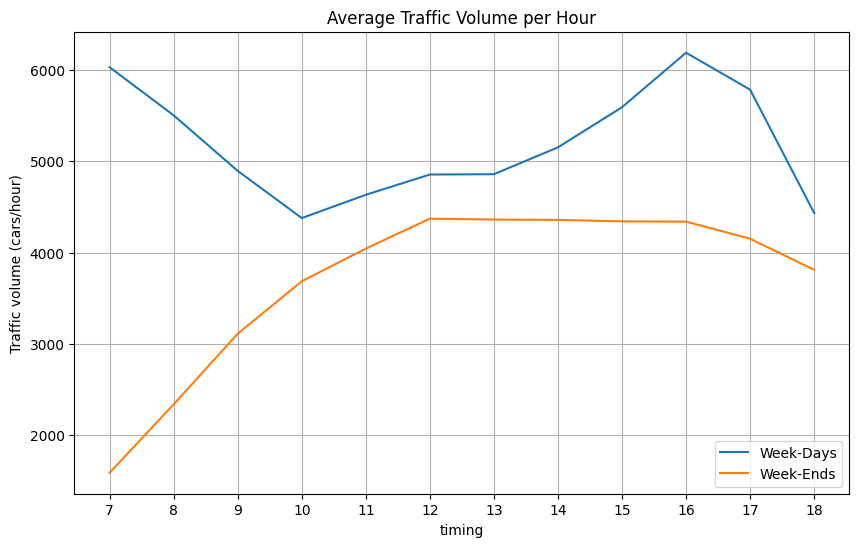

In [34]:
plt.figure(figsize=(10, 6)) 
by_hour_business['traffic_volume'].plot.line(label='Week-Days')
by_hour_weekend['traffic_volume'].plot.line(label='Week-Ends') 
plt.xlabel('timing')
plt.xticks(ticks=[7,8,9,10,11,12,13,14,15,16,17,18])
plt.ylabel('Traffic volume (cars/hour)')
plt.title('Average Traffic Volume per Hour')
plt.legend()
plt.grid()
plt.show()

**Business Days Analysis:**
The weekday line graph reveals a distinct pattern throughout the day. Traffic volume experiences an initial surge at around 7 AM, followed by a gradual decline until approximately 10 AM. Subsequently, there's a steady rise from 10 AM to around 4 PM, reaching its peak after this mid-afternoon window at 4 PM. Afterward, traffic gradually subsides, making its way down to 6 PM. This pattern suggests a correlation between traffic peaks and the typical work and school schedules. The morning rush aligns with the start of work and school hours, followed by a surge during late morning and early afternoon when people are on the move. The afternoon descent corresponds with the end of work hours and the return journey.

**Weekends Analysis:**
The weekend line graph unveils a contrasting trend in comparison to business days. Traffic volume shows a gradual and consistent increase from the morning hours, with the highest point reached at around 12 PM (noon). The trend continues to be constant from noon until around 4 PM and then descends from 4 PM uptil 6 PM. This trend suggests a different lifestyle pattern during weekends, where people tend to start their day later and traffic volume gradually builds up as the morning progresses. The noon peak aligns with a delayed start to the day, often associated with leisurely activities rather than the morning rush of work-related commutes.

In [35]:
correlation= daytime[numeric_columns].corr()

In [36]:
correlation

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.010815,-0.019286,-0.135519,0.128317
rain_1h,0.010815,1.000000,-0.000091,0.004993,0.003697
snow_1h,-0.019286,-0.000091,1.000000,0.027721,0.001265
clouds_all,-0.135519,0.004993,0.027721,1.000000,-0.032932
traffic_volume,0.128317,0.003697,0.001265,-0.032932,1.000000


Text(0.5, 1.0, 'Scatter Plot between Traffic Volume and Temperature')

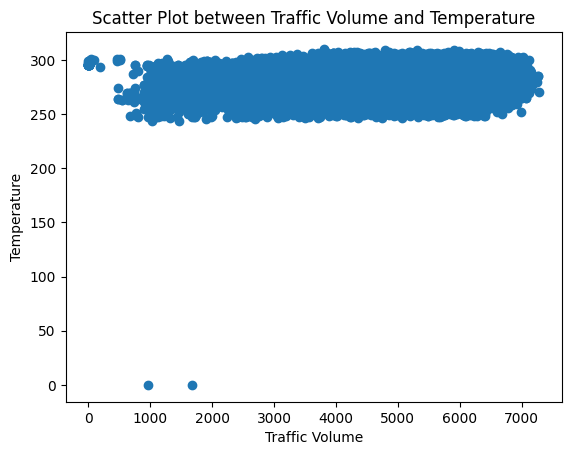

In [37]:
plt.scatter(daytime['traffic_volume'], daytime['temp'])
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')
plt.title('Scatter Plot between Traffic Volume and Temperature')

**These weather columns do not seem like reliable indicators for heavy traffic**
 The scatter plot does not exhibit discernible patterns or trends with changes in the weather columns, it indicates that none of the weather columns are reliable indicators for heavy traffic in this specific traffic volume range (250-300). The lack of significant variation in traffic volume across different weather conditions implies that factors other than the weather might play a more significant role in influencing traffic during this range.

In [50]:
by_weather_main = daytime.groupby('weather_main')['traffic_volume'].agg(['count', 'mean'])
by_weather_description = daytime.groupby('weather_description')['traffic_volume'].agg(['count', 'mean'])

In [51]:
by_weather_main


,count,mean
weather_main,,
Clear,5744,4778.416260
Clouds,8702,4865.415996
Drizzle,883,4837.212911
Fog,362,4372.491713
Haze,834,4609.893285
Mist,2593,4623.976475
Rain,2841,4815.568462
Smoke,12,4564.583333
Snow,1454,4396.321183


In [52]:
by_weather_description

,count,mean
weather_description,,
SQUALLS,1,4211.000000
Sky is Clear,852,4919.009390
broken clouds,2793,4824.130326
drizzle,278,4737.330935
few clouds,1143,4839.818023
fog,362,4372.491713
freezing rain,2,4314.000000
haze,834,4609.893285
heavy intensity drizzle,29,4738.586207


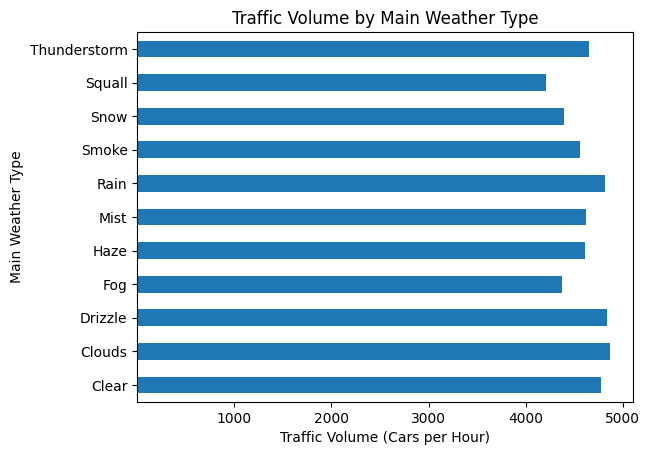

In [70]:
by_weather_main['mean'].plot.barh() 
plt.xlabel('Traffic Volume (Cars per Hour)')
plt.xticks(ticks=[1000,2000,3000,4000,5000])
plt.ylabel('Main Weather Type')
plt.title('Traffic Volume by Main Weather Type')
plt.show()

Analyzing the bar plot reveals that **none of the recorded traffic volumes exceed the threshold of 5,000 cars**. While this suggests that heavy traffic situations—defined by high volume—are absent in the dataset, it's important to note that the plot does not exhibit any weather type consistently associated with heavy traffic. All weather main categories seem to exhibit traffic volumes below the 5,000 mark, reinforcing the absence of distinct heavy traffic indicators within this dataset.

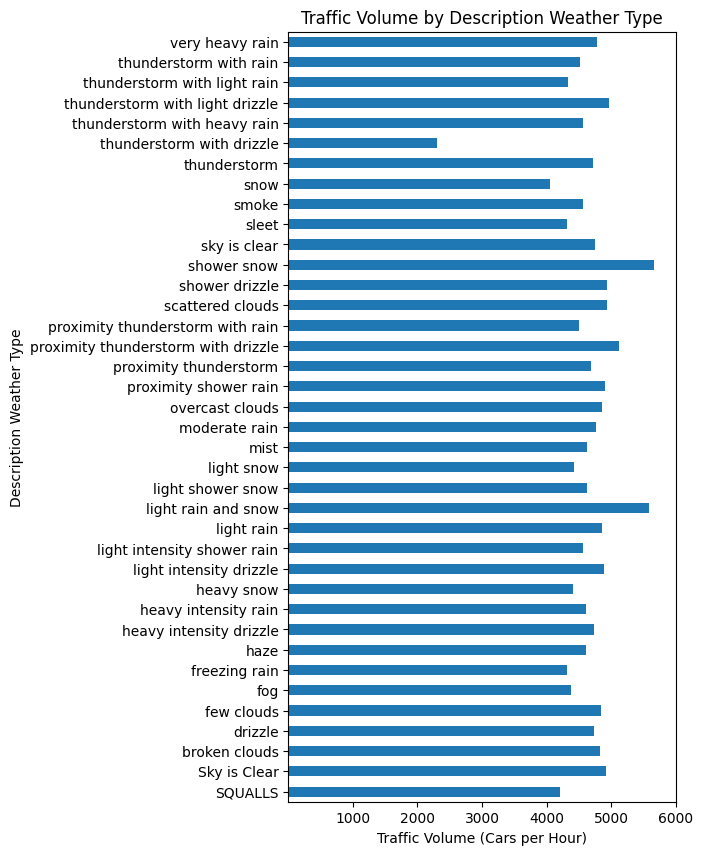

In [68]:
plt.figure(figsize=(5,10))
by_weather_description['mean'].plot.barh() #create h bar plot
plt.xlabel('Traffic Volume (Cars per Hour)')
plt.xticks(ticks=[1000,2000,3000,4000,5000,6000])
plt.ylabel('Description Weather Type')
plt.title('Traffic Volume by Description Weather Type')
plt.show()

Upon analyzing the bar plot, a notable observation emerges: two distinct weather types, namely **"shower snow"** , **proximity thunderstorm with drizzle** and **"light rain and snow,"** exhibit traffic volumes that **exceed the 5,000 car mark**. While the overall dataset lacks instances of traffic volume surpassing this threshold, these particular weather conditions stand out as potential indicators of heavier traffic.

This observation could imply that weather conditions characterized by "shower snow" and "light rain and snow" might contribute to increased traffic volume, possibly due to road conditions requiring more cautious driving or a higher number of commuters opting for personal transportation instead of other modes. It's important to investigate these weather conditions further and consider external factors that might coincide with the higher traffic volume during these specific weather types.

**Conclusion**
Indicators of Heavy Traffic on I-94 westbound:
Warmer Months (March - October)
Weekdays (Monday - Friday)
Daytime (7am - 7pm)
Rush Hour (7am and 4pm)
Some Weather Patterns (light rain/snow, proximal thunderstorm w/drizzle, shower snow)